In [88]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime

# Initialize
1. File path where the input data files reside.
2. Dictionary of major airports consisting of IATA airport codes and airport city names

In [89]:
# Assign the directory of the input data files to a variable
input_data_path = 'Resources/'

# Since we are only interested in data related to major airports, create a dictionary of major
# airports. For later, it is helpful to have the IATA code and the city name.
major_airports = {'ATL': 'Atlanta',
                  'AUS': 'Austin',
                  'BNA': 'Nashville',
                  'BOS': 'Boston',
                  'BWI': 'Baltimore',
                  'CLT': 'Charlotte',
                  'DCA': 'Washington/National',
                  'DEN': 'Denver',
                  'DFW': 'Dallas/Ft. Worth',
                  'DTW': 'Detroit',
                  'EWR': 'Newark',
                  'FLL': 'Ft. Lauderdale',
                  'IAD': 'Washington/Dulles',
                  'IAH': 'Houston',
                  'JFK': 'New York/JFK',
                  'LAS': 'Las Vegas',
                  'LAX': 'Los Angeles',
                  'LGA': 'New York/LaGuardia',
                  'MCO': 'Orlando',
                  'MDW': 'Chicago/Midway',
                  'MIA': 'Miami',
                  'MSP': 'Minneapolis/St. Paul',
                  'ORD': "Chicago/O'Hare",
                  'PHL': 'Philadelphia',
                  'PHX': 'Phoenix',
                  'SAN': 'San Diego',
                  'SEA': 'Seattle',
                  'SFO': 'San Francisco',
                  'SLC': 'Salt Lake City',
                  'TPA': 'Tampa'}


# Step 1: Import flight data

In [90]:
# Create a list that contains the flights file names
flights_files = glob.glob(f'{input_data_path}On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv')

for file in flights_files:
    print(file)

Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_4.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_12.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_1.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_5.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_7.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_3.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_10.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_11.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_2.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_10.csv
Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2

In [91]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all flights from
# 01/01/2018 to 12/31/2023.
flights_dataframes = []

# Loop over the files in the flight files list and process the data in each file
# i = 0
for file in flights_files:

    # Read the file into a DataFrame
    print(f'Processing file {file}...')
    try:
        df = pd.read_csv(f'{file}', low_memory=False)
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Strip out any leading or trailing whitespace from column names and make sure columns
    # are lower case
    df.rename(columns = {name:name.strip().lower() for name in df.columns}, inplace=True)
    display(df.head())
    # # Keep only flights that arrive at one of the major airports
    # df = df.loc[df['dest'].isin(major_airports.keys())]

    # Assign list of columns to keep for later
    columns_to_keep = ['year',
                       'quarter',
                       'month',
                       'dayofmonth',
                       'dayofweek',
                       'flightdate',
                       'iata_code_marketing_airline',
                       'flight_number_marketing_airline',
                       'operating_airline',
                       'iata_code_operating_airline',
                       'flight_number_operating_airline',
                       'origin',
                       'origincityname',
                       'dest',
                       'destcityname',
                       'depdelay',
                       'depdelayminutes',
                       'arrdelay',
                       'arrdelayminutes',
                       'cancelled',
                       'cancellationcode',
                       'carrierdelay',
                       'weatherdelay',
                       'nasdelay',
                       'securitydelay',
                       'lateaircraftdelay']
    
    # Keep only columns we want to keep for later
    # Keep only flights (rows) that arrive at one of the major airports
    df = df[columns_to_keep].loc[df['dest'].isin(major_airports.keys())]

    # Append current DataFrame to list of DataFrames
    flights_dataframes.append(df)

    # if i < 3:
    #     print(f'Dataframe for input file {file}:')
    #     print(f'Shape: {flights_dataframes[i].shape}')
    #     print('First five rows')
    #     display(flights_dataframes[i].head())
    #     print('Last five rows')
    #     display(flights_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_flights = pd.concat(flights_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_flights.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_flights.iloc[397076:397086, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_flights.iloc[823480:823490, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_flights.tail())
# print(f'Shape of concatenated DataFrame: {df_flights.shape}')

# display(df.tail())
display(df_flights.tail())
display(df_flights.columns)

Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_4.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,2,4,1,1,2019-04-01,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,2,4,2,2,2019-04-02,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,2,4,3,3,2019-04-03,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,2,4,4,4,2019-04-04,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,2,4,5,5,2019-04-05,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_12.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,4,12,10,2,2019-12-10,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,4,12,10,2,2019-12-10,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,4,12,10,2,2019-12-10,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,4,12,10,2,2019-12-10,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,4,12,10,2,2019-12-10,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_1.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2020,1,1,17,5,2020-01-17,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2020,1,1,18,6,2020-01-18,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2020,1,1,19,7,2020-01-19,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2020,1,1,20,1,2020-01-20,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2020,1,1,21,2,2020-01-21,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_5.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,2,5,11,6,2019-05-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,2,5,11,6,2019-05-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,2,5,11,6,2019-05-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,2,5,11,6,2019-05-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,2,5,11,6,2019-05-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_7.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,3,7,24,3,2019-07-24,G4,G4,20368,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,3,7,29,1,2019-07-29,G4,G4,20368,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,3,7,7,7,2019-07-07,G4,G4,20368,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,3,7,7,7,2019-07-07,G4,G4,20368,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,3,7,8,1,2019-07-08,G4,G4,20368,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_3.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2020,1,3,9,1,2020-03-09,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2020,1,3,9,1,2020-03-09,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2020,1,3,7,6,2020-03-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2020,1,3,7,6,2020-03-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2020,1,3,7,6,2020-03-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_10.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,4,10,1,2,2019-10-01,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,4,10,2,3,2019-10-02,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,4,10,3,4,2019-10-03,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,4,10,4,5,2019-10-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,4,10,5,6,2019-10-05,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_11.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,4,11,23,6,2019-11-23,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,4,11,23,6,2019-11-23,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,4,11,23,6,2019-11-23,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,4,11,23,6,2019-11-23,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,4,11,23,6,2019-11-23,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_2.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2020,1,2,1,6,2020-02-01,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2020,1,2,8,6,2020-02-08,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2020,1,2,13,4,2020-02-13,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2020,1,2,14,5,2020-02-14,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2020,1,2,15,6,2020-02-15,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_10.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,4,10,1,7,2023-10-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,4,10,2,1,2023-10-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,4,10,3,2,2023-10-03,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,4,10,4,3,2023-10-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,4,10,5,4,2023-10-05,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_6.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,2,6,1,6,2019-06-01,F9,F9,20436,F9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,2,6,1,6,2019-06-01,F9,F9,20436,F9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,2,6,1,6,2019-06-01,F9,F9,20436,F9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,2,6,1,6,2019-06-01,F9,F9,20436,F9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,2,6,1,6,2019-06-01,F9,F9,20436,F9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_3.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,1,3,30,6,2019-03-30,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,1,3,31,7,2019-03-31,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,1,3,1,5,2019-03-01,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,1,3,2,6,2019-03-02,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,1,3,3,7,2019-03-03,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_7.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2022,3,7,19,2,2022-07-19,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,7,20,3,2022-07-20,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,7,21,4,2022-07-21,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,7,24,7,2022-07-24,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,7,25,1,2022-07-25,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_1.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,1,1,4,5,2019-01-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,1,1,4,5,2019-01-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,1,1,4,5,2019-01-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,1,1,4,5,2019-01-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,1,1,4,5,2019-01-04,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_7.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,3,7,10,2,2018-07-10,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,3,7,11,3,2018-07-11,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,3,7,12,4,2018-07-12,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,3,7,13,5,2018-07-13,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,3,7,14,6,2018-07-14,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_6.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,2,6,28,4,2018-06-28,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,2,6,29,5,2018-06-29,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,2,6,30,6,2018-06-30,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,2,6,1,5,2018-06-01,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,2,6,2,6,2018-06-02,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_4.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,2,4,7,6,2018-04-07,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,2,4,8,7,2018-04-08,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,2,4,9,1,2018-04-09,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,2,4,10,2,2018-04-10,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,2,4,11,3,2018-04-11,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_5.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,2,5,8,2,2018-05-08,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,2,5,9,3,2018-05-09,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,2,5,10,4,2018-05-10,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,2,5,11,5,2018-05-11,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,2,5,12,6,2018-05-12,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_3.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,1,3,1,3,2023-03-01,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,1,3,1,3,2023-03-01,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,1,3,1,3,2023-03-01,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,1,3,1,3,2023-03-01,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,1,3,1,3,2023-03-01,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_7.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,3,7,2,7,2023-07-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,3,7,5,3,2023-07-05,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,3,7,9,7,2023-07-09,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,3,7,10,1,2023-07-10,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,3,7,11,2,2023-07-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_1.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,1,1,14,7,2018-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,1,1,15,1,2018-01-15,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,1,1,16,2,2018-01-16,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,1,1,17,3,2018-01-17,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,1,1,18,4,2018-01-18,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_6.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,2,6,4,7,2023-06-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,2,6,2,5,2023-06-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,2,6,2,5,2023-06-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_3.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,1,3,17,6,2018-03-17,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,1,3,18,7,2018-03-18,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,1,3,24,6,2018-03-24,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,1,3,25,7,2018-03-25,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,1,3,31,6,2018-03-31,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_5.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,2,5,8,1,2023-05-08,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,2,5,8,1,2023-05-08,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,2,5,8,1,2023-05-08,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,2,5,8,1,2023-05-08,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,2,5,8,1,2023-05-08,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_7.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2021,3,7,3,6,2021-07-03,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2021,3,7,3,6,2021-07-03,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2021,3,7,3,6,2021-07-03,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2021,3,7,3,6,2021-07-03,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2021,3,7,2,5,2021-07-02,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_11.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,4,11,15,4,2018-11-15,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,4,11,16,5,2018-11-16,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,4,11,17,6,2018-11-17,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,4,11,19,1,2018-11-19,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,4,11,20,2,2018-11-20,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_8.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2023,3,8,6,7,2023-08-06,NK,NK,20416,NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,3,8,7,1,2023-08-07,NK,NK,20416,NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,3,8,9,3,2023-08-09,NK,NK,20416,NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,3,8,10,4,2023-08-10,NK,NK,20416,NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,3,8,12,6,2023-08-12,NK,NK,20416,NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_10.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,4,10,1,1,2018-10-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,4,10,2,2,2018-10-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,4,10,3,3,2018-10-03,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,4,10,4,4,2018-10-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,4,10,5,5,2018-10-05,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_12.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,4,12,18,2,2018-12-18,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,4,12,18,2,2018-12-18,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,4,12,18,2,2018-12-18,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,4,12,18,2,2018-12-18,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,4,12,18,2,2018-12-18,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_9.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2018,3,9,17,1,2018-09-17,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,3,9,18,2,2018-09-18,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,3,9,19,3,2018-09-19,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,3,9,20,4,2018-09-20,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,3,9,21,5,2018-09-21,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_8.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,3,8,23,5,2019-08-23,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,3,8,25,7,2019-08-25,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,3,8,26,1,2019-08-26,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,3,8,27,2,2019-08-27,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,3,8,28,3,2019-08-28,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_9.csv...
   Success.


,year,quarter,month,dayofmonth,dayofweek,flightdate,marketing_airline_network,operated_or_branded_code_share_partners,dot_id_marketing_airline,iata_code_marketing_airline,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,duplicate,unnamed: 119
0,2019,3,9,13,5,2019-09-13,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2019,3,9,13,5,2019-09-13,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2019,3,9,13,5,2019-09-13,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2019,3,9,13,5,2019-09-13,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2019,3,9,13,5,2019-09-13,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


,year,quarter,month,dayofmonth,dayofweek,flightdate,iata_code_marketing_airline,flight_number_marketing_airline,operating_airline,iata_code_operating_airline,...,depdelayminutes,arrdelay,arrdelayminutes,cancelled,cancellationcode,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
13362450,2019,3,9,26,4,2019-09-26,AA,5709,OH,OH,...,0.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13362451,2019,3,9,27,5,2019-09-27,AA,5709,OH,OH,...,0.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13362452,2019,3,9,28,6,2019-09-28,AA,5709,OH,OH,...,0.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13362453,2019,3,9,29,7,2019-09-29,AA,5709,OH,OH,...,0.0,-16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13362454,2019,3,9,30,1,2019-09-30,AA,5709,OH,OH,...,64.0,65.0,65.0,0.0,NaN,8.0,0.0,1.0,0.0,56.0


Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'iata_code_marketing_airline', 'flight_number_marketing_airline',
       'operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'origin', 'origincityname', 'dest',
       'destcityname', 'depdelay', 'depdelayminutes', 'arrdelay',
       'arrdelayminutes', 'cancelled', 'cancellationcode', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [92]:
# Convert 'flightdate' to datetime
df_flights['flightdate'] = pd.to_datetime(df_flights['flightdate'], infer_datetime_format=True)
                                          

# Convert 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek' to integers. This will help with sorting, especially by month.
df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']] = df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']].astype(int)
display(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362455 entries, 0 to 13362454
Data columns (total 26 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   year                             int64         
 1   quarter                          int64         
 2   month                            int64         
 3   dayofmonth                       int64         
 4   dayofweek                        int64         
 5   flightdate                       datetime64[ns]
 6   iata_code_marketing_airline      object        
 7   flight_number_marketing_airline  int64         
 8   operating_airline                object        
 9   iata_code_operating_airline      object        
 10  flight_number_operating_airline  int64         
 11  origin                           object        
 12  origincityname                   object        
 13  dest                             object        
 14  destcityname                    

None

# Step 2: Import passenger enplanement data

In [93]:
# Create a list of the input files that contain passengers data
passengers_files = glob.glob(f'{input_data_path}*_Passengers_*.csv')

# for file in passengers_files:
#     print(file)

In [94]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all monthly passenger
# enplanements from January 2018 to December 2023.
passengers_dataframes = []

# Loop over the files in the passengers files list and process the data in each file
# i = 0
for file in passengers_files:

    # Read the passengers file into a DataFrame.
    # Skip the first row in each file since it is a header row we do not need
    print(f'Processing file {file}...')
    # Retrieve IATA airport code from filename
    airport = file[len(input_data_path):len(input_data_path)+3]
    # print(airport)

    # Make sure airport is a major airport (is in the dictionary of major airports)
    if airport in major_airports.keys():
        try:
            df = pd.read_csv(f'{file}',
                             skiprows=1,
                             engine='python')
            print('   Success.')
        except Exception as error:
            print('   Read failed.')
            print('   Error:', error)

        # Keep only columns 'Year', 'Month', and 'Domestic' (for domestic passengers)
        # Keep only rows where the value of the 'Month' field is not equal to 'TOTAL',
        # the 'Year' has a numeric value and is larger than 2017
        df = df[['Year', 'Month', 'DOMESTIC']][(df['Month'] != 'TOTAL') &
                                               (df['Year'].str.isnumeric() == True) &
                                               (df['Year'] > '2017')]
        
        # Add a column called 'Origin' containing the origin airport IATA code
        df['Origin'] = airport

        # Append current DataFrame to list of DataFrames
        passengers_dataframes.append(df)

        # if (airport == 'ATL') or (airport == 'AUS') or (airport == 'BNA'):
        #     print(f'Dataframe of file {file}:')
        #     print(f'Shape: {passengers_dataframes[i].shape}')
        #     print('First five rows')
        #     display(passengers_dataframes[i].head())
        #     print('Last five rows')
        #     display(passengers_dataframes[i].tail())
        #     print('\n' + '='*300 + '\n')

        # i += 1
    else:
        print(f'The airport {airport} was not found.')

# Concatenate all DataFrames into a big DataFrame and reset the index
df_passengers = pd.concat(passengers_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_passengers.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_passengers.iloc[67:77, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_passengers.iloc[139:149, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_passengers.tail())
# print(f'Shape of concatenated DataFrame: {df_passengers.shape}')

display(df.tail())
display(df_passengers.tail())
display(df_passengers.shape)
display(df_passengers.columns)

Processing file Resources/TPA_Passengers_4_10_2024 2_16_51 PM.csv...
   Success.
Processing file Resources/SLC_Passengers_4_10_2024 2_09_13 PM.csv...
   Success.
Processing file Resources/MSP_Passengers_4_10_2024 2_02_58 PM.csv...
   Success.
Processing file Resources/LAX_Passengers_4_10_2024 1_38_33 PM.csv...
   Success.
Processing file Resources/ORD_Passengers_4_10_2024 1_36_41 PM.csv...
   Success.
Processing file Resources/IAD_Passengers_4_10_2024 2_19_35 PM.csv...
   Success.
Processing file Resources/PHL_Passengers_4_10_2024 2_07_39 PM.csv...
   Success.
Processing file Resources/DCA_Passengers_4_10_2024 2_11_18 PM.csv...
   Success.
Processing file Resources/BOS_Passengers_4_10_2024 1_58_33 PM.csv...
   Success.
Processing file Resources/SEA_Passengers_4_10_2024 1_50_09 PM.csv...
   Success.
Processing file Resources/SAN_Passengers_4_10_2024 2_13_31 PM.csv...
   Success.
Processing file Resources/EWR_Passengers_4_10_2024 1_53_01 PM.csv...
   Success.
Processing file Resources/AT

,Year,Month,DOMESTIC,Origin
271,2023,8,"3,267,057",DEN
272,2023,9,"3,194,747",DEN
273,2023,10,"3,317,837",DEN
274,2023,11,"2,956,571",DEN
275,2023,12,"2,967,644",DEN


,Year,Month,DOMESTIC,Origin
2155,2023,8,"3,267,057",DEN
2156,2023,9,"3,194,747",DEN
2157,2023,10,"3,317,837",DEN
2158,2023,11,"2,956,571",DEN
2159,2023,12,"2,967,644",DEN


(2160, 4)

Index(['Year', 'Month', 'DOMESTIC', 'Origin'], dtype='object')

In [95]:
# Convert 'Year' and 'Month' to integers. This will help with proper sorting, especially by month.
df_passengers[['Year', 'Month']] = df_passengers[['Year', 'Month']].astype(int)

display(df_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int64 
 1   Month     2160 non-null   int64 
 2   DOMESTIC  2160 non-null   object
 3   Origin    2160 non-null   object
dtypes: int64(2), object(2)
memory usage: 67.6+ KB


None

# Step 3: Import Fare data

In [96]:
# Create a list of the input files that contain fares data
fares_files = glob.glob(f'{input_data_path}AverageFare_Q*.csv')

for file in fares_files:
     print(file)

Resources/AverageFare_Q1_2019.csv
Resources/AverageFare_Q1_2018.csv
Resources/AverageFare_Q1_2023.csv
Resources/AverageFare_Q1_2022.csv
Resources/AverageFare_Q1_2020.csv
Resources/AverageFare_Q1_2021.csv
Resources/AverageFare_Q4_2019.csv
Resources/AverageFare_Q4_2018.csv
Resources/AverageFare_Q4_2020.csv
Resources/AverageFare_Q4_2021.csv
Resources/AverageFare_Q4_2022.csv
Resources/AverageFare_Q3_2020.csv
Resources/AverageFare_Q2_2020.csv
Resources/AverageFare_Q2_2021.csv
Resources/AverageFare_Q3_2021.csv
Resources/AverageFare_Q2_2023.csv
Resources/AverageFare_Q3_2023.csv
Resources/AverageFare_Q3_2022.csv
Resources/AverageFare_Q2_2022.csv
Resources/AverageFare_Q3_2019.csv
Resources/AverageFare_Q2_2019.csv
Resources/AverageFare_Q2_2018.csv
Resources/AverageFare_Q3_2018.csv


In [97]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all quarterly fare
# averages from Q1 2018 to Q3 2023.
fares_dataframes = []

# Loop over the files in the fares files list and process the data in each file
# i = 0
for file in fares_files:

    # Read the fares file into a DataFrame.
    print(f'Processing file {file}...')

    try:
        df = pd.read_csv(f'{file}')
        print('   Success.')
        print(df.columns)
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)
        continue
    # Keep only columns 'Quarter', 'Year', 'Airport Code', 'City Name',
    # 'Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'
    # Keep only fares (rows) that arrive at one of the major airports
    df = df[['Quarter',
            'Year',
            'Airport Code',
            'City Name',
            'Average Fare ($)',
            'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)']].loc[df['Airport Code'].isin(major_airports.keys())]
    
    # Append current DataFrame to list of DataFrames
    fares_dataframes.append(df)

    # if i<3:
    #     print(f'Dataframe of file {file}:')
    #     print(f'Shape: {fares_dataframes[i].shape}')
    #     print('First five rows')
    #     display(fares_dataframes[i].head())
    #     print('Last five rows')
    #     display(fares_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_fares = pd.concat(fares_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_fares.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_fares.iloc[25:35, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_fares.iloc[55:65, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_fares.tail())
# print(f'Shape of concatenated DataFrame: {df_fares.shape}')

display(df.tail())
display(df_fares.tail())
display(df_fares.shape)
display(df_fares.columns)

Processing file Resources/AverageFare_Q1_2019.csv...
   Success.
Index(['Quarter', 'Year', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)',
       '2022 Passengers (10% sample)'],
      dtype='object')
Processing file Resources/AverageFare_Q1_2018.csv...
   Success.
Index(['Quarter', 'Year', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)',
       '2022 Passengers (10% sample)'],
      dtype='object')
Processing file Resources/AverageFare_Q1_2023.csv...
   Success.
Index(['Quarter', 'Year', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)',
       '2022 Passengers (10% sample)'],
      dtype='object')
Processing file Resources/AverageFare_Q1_2022.csv...
   Success.
Index

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
26,3.0,2018.0,BNA,Nashville,341.80,415.85
27,3.0,2018.0,SLC,Salt Lake City,350.07,425.91
28,3.0,2018.0,CLT,Charlotte,418.41,509.06
32,3.0,2018.0,MDW,Chicago-Midway,305.07,371.17
35,3.0,2018.0,IAD,Washington-Dulles,423.12,514.79


,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
685,3.0,2018.0,BNA,Nashville,341.80,415.85
686,3.0,2018.0,SLC,Salt Lake City,350.07,425.91
687,3.0,2018.0,CLT,Charlotte,418.41,509.06
688,3.0,2018.0,MDW,Chicago-Midway,305.07,371.17
689,3.0,2018.0,IAD,Washington-Dulles,423.12,514.79


(690, 6)

Index(['Quarter', 'Year', 'Airport Code', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'],
      dtype='object')

In [98]:
# Rename the column 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)' to 'Inflation Adjusted Average Fare ($)'
df_fares = df_fares.rename(columns={'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)':
                                        'Inflation Adjusted Average Fare ($)'})

In [99]:
# Convert columns 'Quarter' and 'Year' into integers
df_fares[['Quarter', 'Year']] = df_fares[['Quarter', 'Year']].astype(int)

display(df_fares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quarter                              690 non-null    int64  
 1   Year                                 690 non-null    int64  
 2   Airport Code                         690 non-null    object 
 3   City Name                            690 non-null    object 
 4   Average Fare ($)                     690 non-null    float64
 5   Inflation Adjusted Average Fare ($)  690 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 32.5+ KB


None

# Step 4: Raw flights data consistency checks

In [100]:
# Count the number of values in each column of the 'df_flights' DataFrame
display(df_flights.count())
# The maximum of the column count values is equal to the total number of flights
# in our dataset
total_flights = max(df_flights.count())
print(f'Total number of flights: {total_flights:,}.')

year                               13362455
quarter                            13362455
month                              13362455
dayofmonth                         13362455
dayofweek                          13362455
flightdate                         13362455
iata_code_marketing_airline        13362455
flight_number_marketing_airline    13362455
operating_airline                  13362455
iata_code_operating_airline        13362455
flight_number_operating_airline    13362455
origin                             13362455
origincityname                     13362455
dest                               13362455
destcityname                       13362455
depdelay                           13079300
depdelayminutes                    13079300
arrdelay                           13037701
arrdelayminutes                    13037701
cancelled                          13362455
cancellationcode                     289740
carrierdelay                        2530502
weatherdelay                    

Total number of flights: 13,362,455.


Since the passenger enplanement raw data is aggregated by airport, year, and month
we need to aggregate the flights data by airport, year, and month as well, so we can
properly correlate the data from different sources.

> [!NOTE]: As customers we are interested in arrival delays more than departure delays.
>          Therefore, we are picking the destination airport, 'dest', in our aggregation.

In [101]:
# Find the counts
df_flights_summary = df_flights.groupby(['year', 'month', 'dest']).count()
display(df_flights_summary.head())

# Perform consistency check: If we sum over the aggregation, we should get back the
# values obtained using the 'count()' function above. The index columns are not shown.
display(df_flights_summary.sum())

# Through manual inspection we can convice ourselves that our expectation is met.

quarter  dayofmonth  dayofweek  flightdate  \
year month dest                                               
2018 1     ATL     30730       30730      30730       30730   
           AUS      4713        4713       4713        4713   
           BNA      5789        5789       5789        5789   
           BOS     11306       11306      11306       11306   
           BWI      8560        8560       8560        8560   

                 iata_code_marketing_airline  flight_number_marketing_airline  \
year month dest                                                                 
2018 1     ATL                         30730                            30730   
           AUS                          4713                             4713   
           BNA                          5789                             5789   
           BOS                         11306                            11306   
           BWI                          8560                             8560   

                 operating_airline  iata_code_operating_airline  \
year month dest                                                   
2018 1     ATL               30730                        30730   
           AUS                4713                         4713   
           BNA                5789                         5789   
           BOS               11306                        11306   
           BWI                8560                         8560   

                 flight_number_operating_airline  origin  ...  \
year month dest                                           ...   
2018 1     ATL                             30730   30730  ...   
           AUS                              4713    4713  ...   
           BNA                              5789    5789  ...   
           BOS                             11306   11306  ...   
           BWI                              8560    8560  ...   

                 depdelayminutes  arrdelay  arrdelayminutes  cancelled  \
year month dest                                                          
2018 1     ATL             29865     29833            29833      30730   
           AUS              4611      4607             4607       4713   
           BNA              5613      5595             5595       5789   
           BOS             10507     10492            10492      11306   
           BWI              8342      8333             8333       8560   

                 cancellationcode  carrierdelay  weatherdelay  nasdelay  \
year month dest                                                           
2018 1     ATL                882          4849          4849      4849   
           AUS                102           634           634       634   
           BNA                179           971           971       971   
           BOS                805          2606          2606      2606   
           BWI                220          1175          1175      1175   

                 securitydelay  lateaircraftdelay  
year month dest                                    
2018 1     ATL            4849               4849  
           AUS             634                634  
           BNA             971                971  
           BOS            2606               2606  
           BWI            1175               1175  

[5 rows x 23 columns]

quarter                            13362455
dayofmonth                         13362455
dayofweek                          13362455
flightdate                         13362455
iata_code_marketing_airline        13362455
flight_number_marketing_airline    13362455
operating_airline                  13362455
iata_code_operating_airline        13362455
flight_number_operating_airline    13362455
origin                             13362455
origincityname                     13362455
destcityname                       13362455
depdelay                           13079300
depdelayminutes                    13079300
arrdelay                           13037701
arrdelayminutes                    13037701
cancelled                          13362455
cancellationcode                     289740
carrierdelay                        2530502
weatherdelay                        2530502
nasdelay                            2530502
securitydelay                       2530502
lateaircraftdelay               

Determine the number of flights by airport per year and month.
We can use any column that has a value count equal to 'total_flights' in the 'df_flights'
DataFrame. We are picking 'flight_number_marketing_airline'.

In [102]:
# Sort the data by index to make sure it lines up properly when we combine it with passenger
# data
df_flights_summary = df_flights_summary[['flight_number_marketing_airline']].sort_index()
# df_flights_exploration.sort_index()
display(df_flights_summary.head())
display(df_flights_summary.tail())

flight_number_marketing_airline
year month dest                                 
2018 1     ATL                             30730
           AUS                              4713
           BNA                              5789
           BOS                             11306
           BWI                              8560

flight_number_marketing_airline
year month dest                                 
2023 10    SAN                              8079
           SEA                             15733
           SFO                             12022
           SLC                              9446
           TPA                              6608

In [103]:
# Determine the number of records. It should be #years * #months per year * #airports.
# In our case, 6*12*30=2160. That is what we get.
df_flights_summary.count()

flight_number_marketing_airline    960
dtype: int64

# Step 5: Prepare a Summary DataFrame for Visualization

In [104]:
# Rename the column to something more meaningful
df_flights_summary = df_flights_summary.rename(columns={'flight_number_marketing_airline': 'No. of Flights'})

In [105]:
# Calculate the average delay on arrival in minutes by year, month and arrival airport, round to two digits, and sort.
df_arrdelay_mean = df_flights[['year', 'month', 'dest', 'arrdelayminutes']].groupby(['year', 'month', 'dest']).mean().round(2).sort_index()
display(df_arrdelay_mean.head())
display(df_arrdelay_mean.tail())

# Add average delay on arrival to the DataFrame
df_flights_summary['Average Delay (Minutes)'] = df_arrdelay_mean['arrdelayminutes']
display(df_flights_summary.head())
display(df_flights_summary.tail())

arrdelayminutes
year month dest                 
2018 1     ATL             14.58
           AUS              8.97
           BNA             11.02
           BOS             18.42
           BWI              9.09

arrdelayminutes
year month dest                 
2023 10    SAN             11.42
           SEA              7.88
           SFO             10.87
           SLC              7.11
           TPA             11.18

No. of Flights  Average Delay (Minutes)
year month dest                                         
2018 1     ATL            30730                    14.58
           AUS             4713                     8.97
           BNA             5789                    11.02
           BOS            11306                    18.42
           BWI             8560                     9.09

No. of Flights  Average Delay (Minutes)
year month dest                                         
2023 10    SAN             8079                    11.42
           SEA            15733                     7.88
           SFO            12022                    10.87
           SLC             9446                     7.11
           TPA             6608                    11.18

In [106]:
# Calculate cancellations by year, month, and airport. To calculate the
# cancellations we sum over the 'cancelled' column of the 'df_flights' DataFrame
# since, according to the data dictionary, it has a value of 1 when a flight is
# cancelled and a value of 0 if it is not cancelled.
# Also, convert the number of cancellations to integer and sort by index.
df_cancelled = df_flights[['year', 'month', 'dest', 'cancelled']].groupby(['year', 'month', 'dest']).sum().astype(int).sort_index()
display(df_cancelled.head())
display(df_cancelled.tail())

# Add the cancellations to the summary DataFrame
df_flights_summary['Cancelled Flights'] = df_cancelled['cancelled']
display(df_flights_summary.head())
display(df_flights_summary.tail())

cancelled
year month dest           
2018 1     ATL         882
           AUS         102
           BNA         179
           BOS         805
           BWI         220

cancelled
year month dest           
2023 10    SAN          20
           SEA          26
           SFO          46
           SLC           6
           TPA          17

No. of Flights  Average Delay (Minutes)  Cancelled Flights
year month dest                                                            
2018 1     ATL            30730                    14.58                882
           AUS             4713                     8.97                102
           BNA             5789                    11.02                179
           BOS            11306                    18.42                805
           BWI             8560                     9.09                220

No. of Flights  Average Delay (Minutes)  Cancelled Flights
year month dest                                                            
2023 10    SAN             8079                    11.42                 20
           SEA            15733                     7.88                 26
           SFO            12022                    10.87                 46
           SLC             9446                     7.11                  6
           TPA             6608                    11.18                 17

In [107]:

# Calculate the percentage of flights cancelled to allow for an easy comparison across airports, months, and years.
df_flights_summary['Cancelled %'] = df_flights_summary['Cancelled Flights']/df_flights_summary['No. of Flights']*100

display(df_flights_summary.head())
display(df_flights_summary.count())

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2018 1     ATL            30730                    14.58                882   
           AUS             4713                     8.97                102   
           BNA             5789                    11.02                179   
           BOS            11306                    18.42                805   
           BWI             8560                     9.09                220   

                 Cancelled %  
year month dest               
2018 1     ATL      2.870159  
           AUS      2.164227  
           BNA      3.092071  
           BOS      7.120113  
           BWI      2.570093

No. of Flights             960
Average Delay (Minutes)    960
Cancelled Flights          960
Cancelled %                960
dtype: int64

Add the number of passengers from the 'df_passengers' DataFrame. Note that it
has the same number of records as the 'df_flights_summary' DataFrame.
So, if we set the index of the 'df_passenger' DataFrame the same as the 'df_flights_summary'
DataFrame and sort the same way we can just copy the columns with the passenger numbers
into a new column in 'df_flights_summary'.

In [108]:
# Set the (multi) index and sort
df_passengers = df_passengers.set_index(['Year', 'Month', 'Origin']).sort_index()
display(df_passengers.head())
display(df_passengers.tail())

df_flights_summary['Enplaned Passengers'] = df_passengers['DOMESTIC']
display(df_flights_summary.head())
display(df_flights_summary.tail())

DOMESTIC
Year Month Origin           
2018 1     ATL     3,232,202
           AUS       483,324
           BNA       483,139
           BOS     1,027,783
           BWI       882,892

DOMESTIC
Year Month Origin           
2023 12    SAN       982,726
           SEA     1,658,110
           SFO     1,446,506
           SLC       979,522
           TPA       982,672

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2018 1     ATL            30730                    14.58                882   
           AUS             4713                     8.97                102   
           BNA             5789                    11.02                179   
           BOS            11306                    18.42                805   
           BWI             8560                     9.09                220   

                 Cancelled % Enplaned Passengers  
year month dest                                   
2018 1     ATL      2.870159           3,232,202  
           AUS      2.164227             483,324  
           BNA      3.092071             483,139  
           BOS      7.120113           1,027,783  
           BWI      2.570093             882,892

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2023 10    SAN             8079                    11.42                 20   
           SEA            15733                     7.88                 26   
           SFO            12022                    10.87                 46   
           SLC             9446                     7.11                  6   
           TPA             6608                    11.18                 17   

                 Cancelled % Enplaned Passengers  
year month dest                                   
2023 10    SAN      0.247555           1,036,095  
           SEA      0.165258           1,889,568  
           SFO      0.382632           1,548,604  
           SLC      0.063519           1,062,686  
           TPA      0.257264             914,515

The fares are only available by quarter, however, our other data is available by month.
Therefore, we will add a column for the month to the fares dataframe and use the data
for the quarter for each month in that quarter.

In [109]:
# Replicate each row three times since each quarter consists of three months
df_fares_monthly = pd.DataFrame(np.repeat(df_fares.values, 3, axis=0))

# Since this did not preserve the column labels, add them back
df_fares_monthly.columns = df_fares.columns
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1,2019,LAX,Los Angeles,335.56,407.13
1,1,2019,LAX,Los Angeles,335.56,407.13
2,1,2019,LAX,Los Angeles,335.56,407.13
3,1,2019,ORD,Chicago-O'Hare,355.0,430.72
4,1,2019,ORD,Chicago-O'Hare,355.0,430.72


In [110]:
# Sort by year and quarter
df_fares_monthly.sort_values(by=['Year', 'Quarter'], inplace=True)
display(df_fares_monthly.head())
display(df_fares_monthly.shape)

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
90,1,2018,LAX,Los Angeles,336.93,415.52
91,1,2018,LAX,Los Angeles,336.93,415.52
92,1,2018,LAX,Los Angeles,336.93,415.52
93,1,2018,ORD,Chicago-O'Hare,341.14,420.71
94,1,2018,ORD,Chicago-O'Hare,341.14,420.71


(2070, 6)

Create a list of months

In [111]:
# Set a list of quarters equal to the 'Quarter' column in 'df_fares_monthly'
quarters = df_fares_monthly['Quarter'].to_list()

# Initialize a list for the months
months = []

# Loop over the list of quarters and create a list of months.
# The month is given by the remainder of dividing the index by three
# (giving 0, 1, 2) and adding 1 for Q1, 4 for Q2, 7 for Q3, and 10 for Q4.
# The set of numbers 1, 4, 7, and 10 is calculated by adding one to the product
# of the quarter number minus 1 and three.
for i in range(len(quarters)):
    months.append(i%3+((quarters[i]-1)*3+1))
    # print(f'Index: {i}, Quarter: {quarters[i]} Month: {months[i]}')

# Add the list of months as a column to the 'df_fares_monthly' dataframe.
df_fares_monthly['Month'] = months
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),Month
90,1,2018,LAX,Los Angeles,336.93,415.52,1
91,1,2018,LAX,Los Angeles,336.93,415.52,2
92,1,2018,LAX,Los Angeles,336.93,415.52,3
93,1,2018,ORD,Chicago-O'Hare,341.14,420.71,1
94,1,2018,ORD,Chicago-O'Hare,341.14,420.71,2


In [112]:
# Drop the 'Quarter' column and rearrange the columns
df_fares_monthly = df_fares_monthly[['Year',
                                     'Month',
                                     'Airport Code',
                                     'City Name',
                                     'Average Fare ($)',
                                     'Inflation Adjusted Average Fare ($)'
                                   ]]
display(df_fares_monthly.head())


,Year,Month,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
90,2018,1,LAX,Los Angeles,336.93,415.52
91,2018,2,LAX,Los Angeles,336.93,415.52
92,2018,3,LAX,Los Angeles,336.93,415.52
93,2018,1,ORD,Chicago-O'Hare,341.14,420.71
94,2018,2,ORD,Chicago-O'Hare,341.14,420.71


In [113]:
# Prepare the 'df_flights_summary' DataFrame for merger with the 'df_fares_monthly'
# Dataframe by
#   * Resetting the index and
#   * Renaming the 'year', 'month', and 'dest' columns to 'Year', 'Month', and
#     'Airport Code'
df_flights_summary = df_flights_summary.reset_index()
df_flights_summary = df_flights_summary.rename(columns = {'year': 'Year',
                                                          'month': 'Month',
                                                          'dest': 'Airport Code'})
display(df_flights_summary.head())

,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers
0,2018,1,ATL,30730,14.58,882,2.870159,"3,232,202"
1,2018,1,AUS,4713,8.97,102,2.164227,"483,324"
2,2018,1,BNA,5789,11.02,179,3.092071,"483,139"
3,2018,1,BOS,11306,18.42,805,7.120113,"1,027,783"
4,2018,1,BWI,8560,9.09,220,2.570093,"882,892"


In [114]:
# Merge the 'df_fares_monthly' DataFrame and the 'df_flights_summary' DataFrame
# into the final summary DataFrame
df_summary = pd.merge(df_flights_summary, df_fares_monthly,
                      how='left',
                      left_on=['Year', 'Month', 'Airport Code'],
                      right_on=['Year', 'Month', 'Airport Code'])

display(df_summary.head())
display(df_summary.tail())

,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,ATL,30730,14.58,882,2.870159,"3,232,202",Atlanta,361.16,445.4
1,2018,1,AUS,4713,8.97,102,2.164227,"483,324",Austin,348.72,430.06
2,2018,1,BNA,5789,11.02,179,3.092071,"483,139",Nashville,351.81,433.87
3,2018,1,BOS,11306,18.42,805,7.120113,"1,027,783",Boston,323.31,398.73
4,2018,1,BWI,8560,9.09,220,2.570093,"882,892",Baltimore,310.95,383.47


,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
955,2023,10,SAN,8079,11.42,20,0.247555,"1,036,095",NaN,NaN,NaN
956,2023,10,SEA,15733,7.88,26,0.165258,"1,889,568",NaN,NaN,NaN
957,2023,10,SFO,12022,10.87,46,0.382632,"1,548,604",NaN,NaN,NaN
958,2023,10,SLC,9446,7.11,6,0.063519,"1,062,686",NaN,NaN,NaN
959,2023,10,TPA,6608,11.18,17,0.257264,"914,515",NaN,NaN,NaN


Silas exploratory data analysis (EDA) is complete. 

<Axes: xlabel='Average Fare ($)', ylabel='Average Delay (Minutes)'>

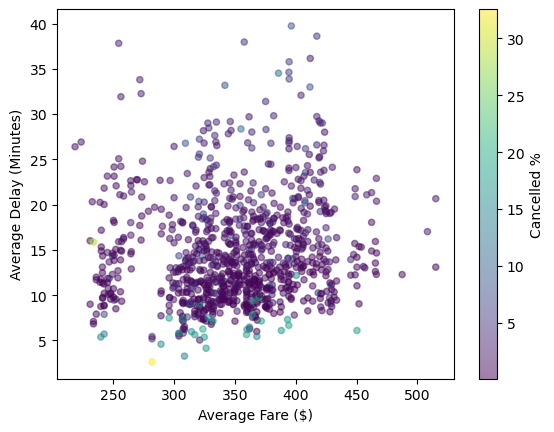

In [115]:
df_summary.plot(kind='scatter', x='Average Fare ($)', y='Average Delay (Minutes)', c='Cancelled %', colormap='viridis', alpha=0.5)

In [116]:
df_summary.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 960 non-null    object 
 1   Month                                960 non-null    int64  
 2   Airport Code                         960 non-null    object 
 3   No. of Flights                       960 non-null    int64  
 4   Average Delay (Minutes)              960 non-null    float64
 5   Cancelled Flights                    960 non-null    int64  
 6   Cancelled %                          960 non-null    float64
 7   Enplaned Passengers                  960 non-null    object 
 8   City Name                            930 non-null    object 
 9   Average Fare ($)                     930 non-null    object 
 10  Inflation Adjusted Average Fare ($)  930 non-null    object 
dtypes: float64(2), int64(3), object(

In [117]:
df_summary.describe()

,Month,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %
count,960.000000,960.000000,960.000000,960.000000,960.000000
mean,6.343750,13919.223958,14.587000,301.812500,2.123490
std,3.238288,6859.014742,5.845934,543.676971,3.277326
min,1.000000,4713.000000,2.630000,6.000000,0.063519
25%,3.750000,8416.750000,10.340000,76.000000,0.651523
50%,6.500000,12765.500000,13.285000,147.000000,1.203127
75%,9.000000,15343.250000,17.705000,300.250000,2.159041
max,12.000000,35837.000000,39.740000,6636.000000,32.572432


In [118]:
df_summary.mean()

/var/folders/0d/lmnzb0d91rlc690fnc9cb4hw0000gq/T/ipykernel_82615/324580235.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_summary.mean()


Year                                    2019.687500
Month                                      6.343750
No. of Flights                         13919.223958
Average Delay (Minutes)                   14.587000
Cancelled Flights                        301.812500
Cancelled %                                2.123490
Average Fare ($)                         351.338742
Inflation Adjusted Average Fare ($)      409.012043
dtype: float64

In [119]:
df_summary.var()

/var/folders/0d/lmnzb0d91rlc690fnc9cb4hw0000gq/T/ipykernel_82615/3997521910.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_summary.var()


Year                                   3.343326e+00
Month                                  1.048651e+01
No. of Flights                         4.704608e+07
Average Delay (Minutes)                3.417495e+01
Cancelled Flights                      2.955846e+05
Cancelled %                            1.074087e+01
Average Fare ($)                       2.720935e+03
Inflation Adjusted Average Fare ($)    3.778689e+03
dtype: float64

In [120]:
df_summary.std()

/var/folders/0d/lmnzb0d91rlc690fnc9cb4hw0000gq/T/ipykernel_82615/1754298100.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_summary.std()


Year                                      1.828477
Month                                     3.238288
No. of Flights                         6859.014742
Average Delay (Minutes)                   5.845934
Cancelled Flights                       543.676971
Cancelled %                               3.277326
Average Fare ($)                         52.162586
Inflation Adjusted Average Fare ($)      61.471039
dtype: float64

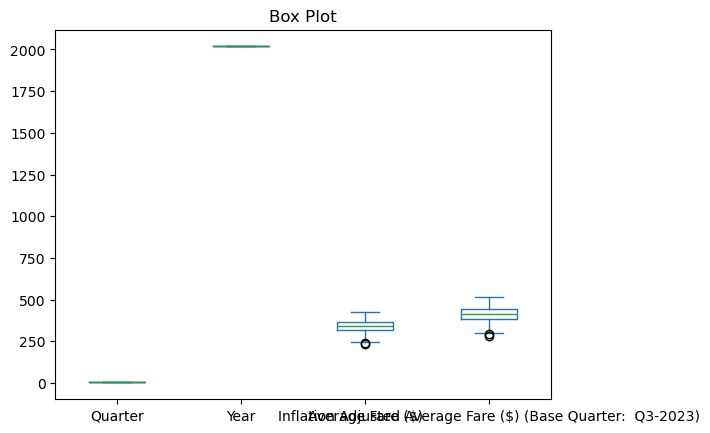

In [121]:
df.plot(kind="box", title="Box Plot")
plt.show()

In [122]:
df_summary.columns

Index(['Year', 'Month', 'Airport Code', 'No. of Flights',
       'Average Delay (Minutes)', 'Cancelled Flights', 'Cancelled %',
       'Enplaned Passengers', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($)'],
      dtype='object')

In [123]:
df["Enplaned Passengers"] = pd.to_numeric(
    df["Enplaned Passengers"], errors="coerce"
).astype("Int64")

KeyError: 'Enplaned Passengers'

In [ ]:
df_year = df_summary[['Year', 'Enplaned Passengers']].groupby('Year').sum()
display(df_year)

,Enplaned Passengers
Year,
2018,"3,232,202483,324483,1391,027,783882,8921,540,4..."
2019,"3,386,637529,680560,9541,064,542827,1701,683,3..."
2020,"3,530,955601,201631,3441,132,859885,6851,874,7..."
2021,"3,616,193744,947819,9431,110,485951,4441,985,5..."
2022,"3,579,498916,466888,0701,369,5891,021,9671,944..."
2023,"3,720,602899,502925,8411,316,740954,3491,976,5..."
